In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List 

In [2]:
def generate_random_clusters_at(centers:List[tuple],spreads:List,num_points_per_cluster:List[int])->pd.core.frame.DataFrame:
    """_summary_

    Args:
        centers (list[tuple]): list of tuples of center coordinate
        spreads (list): list of floating point indicating spreads
        num_points_per_cluster (list[int]): number of points in each cluster.
    """

    num_clusters=len(centers)
    points=[]
    for iind in range(num_clusters):
        point=np.random.randn(num_points_per_cluster[iind],3)
        point[:,:2]=(point[:,:2]+centers[iind])*spreads[iind]
        point[:,2]=iind+1
        points.append(point)
    points = np.concatenate(points,axis=0)
    points=pd.DataFrame(points,columns=['x','y','label'])
    points['label']=pd.Categorical(points['label'])
    return points
    

In [3]:
centers=[(7,3),(3,7),(3,3),(7,7)]
spreads=[1.8,1.5,1.1,1.3]
num_points_per_cluster=[705,3801,915,750]
points=generate_random_clusters_at(centers,spreads,num_points_per_cluster)

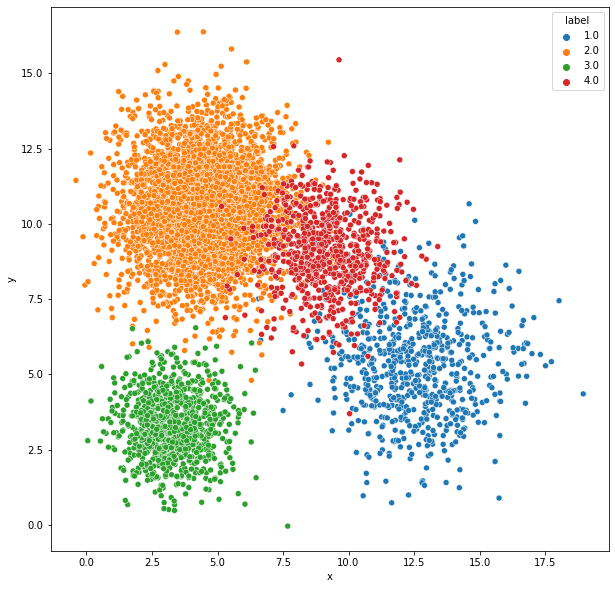

In [4]:
plt.figure(figsize=[10,10])
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [5]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [6]:
knc=[]
scores=[]
cv=5
for k in range(1,1000,5):
    knc.append([k,KNeighborsClassifier(n_neighbors=k)])
    score=cross_val_score(knc[-1][1],points[['x','y']],points['label'],cv=cv)
    scores=scores+[[k,score[iind]] for iind in range(cv)]


KeyboardInterrupt: 

In [ ]:
scores=pd.DataFrame.from_records(scores,columns=['Point','SCORE'])

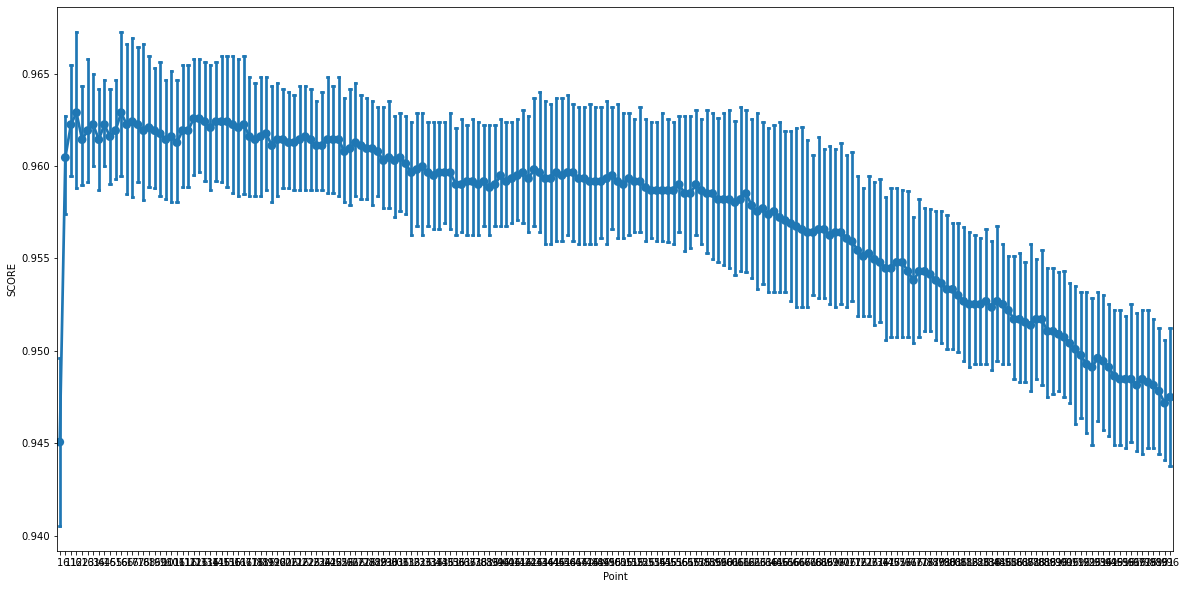

In [ ]:
plt.figure(figsize=[20,10])
sns.pointplot(data=scores, x='Point', y='SCORE', dodge=0.25, capsize=0.25, errorbar='sd')
plt.show()
plt.close()

In [ ]:
attribute_train,attribute_test,label_train,label_test=train_test_split(points[['x','y']],points['label'],test_size=0.3)

In [172]:
xmin = np.min(points['x'])
xmax = np.max(points['x'])
ymin = np.min(points['y'])
ymax = np.max(points['y'])
h=0.1

xx,yy = np.meshgrid(np.arange(xmin,xmax,h),np.arange(ymin,ymax,h))
xx_row = xx.ravel()
yy_row = yy.ravel()



c:\Users\TEST\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-11-e259598d8cfe>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


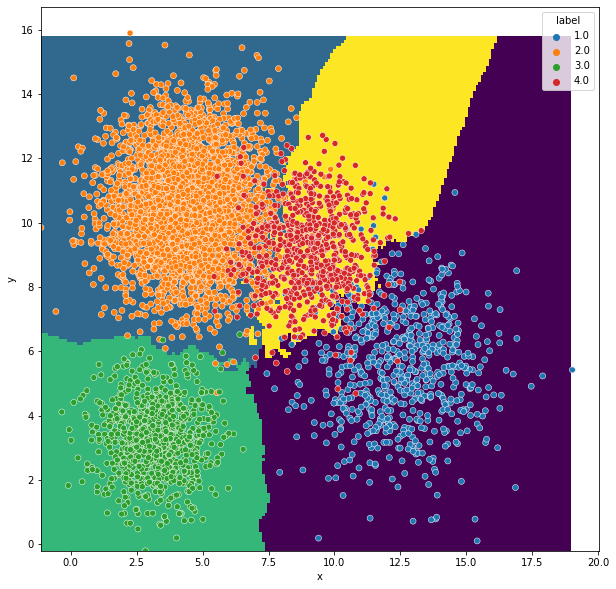

In [ ]:
k = 6
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(attribute_train,label_train)
zz_row=knc.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

c:\Users\TEST\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
<ipython-input-12-d36d39547a6d>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


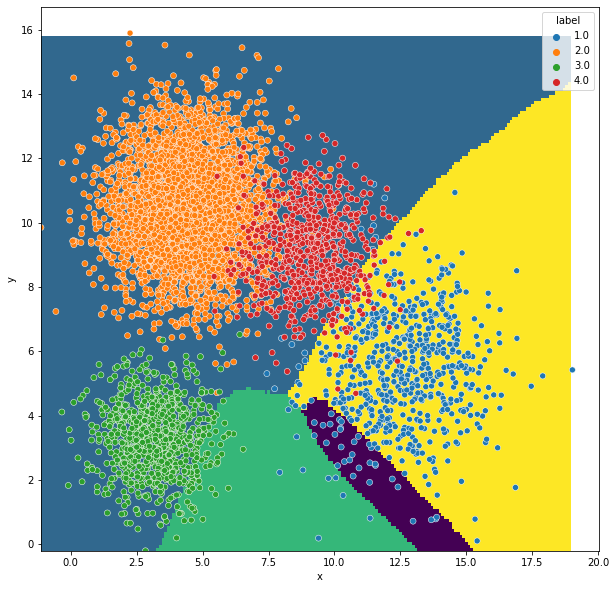

In [ ]:
k = 1500
knc = KNeighborsClassifier(n_neighbors=k)
knc.fit(attribute_train,label_train)
zz_row=knc.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [65]:
from sklearn import svm
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

c:\Users\TEST\anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
<ipython-input-14-28c0d5e2ecf2>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


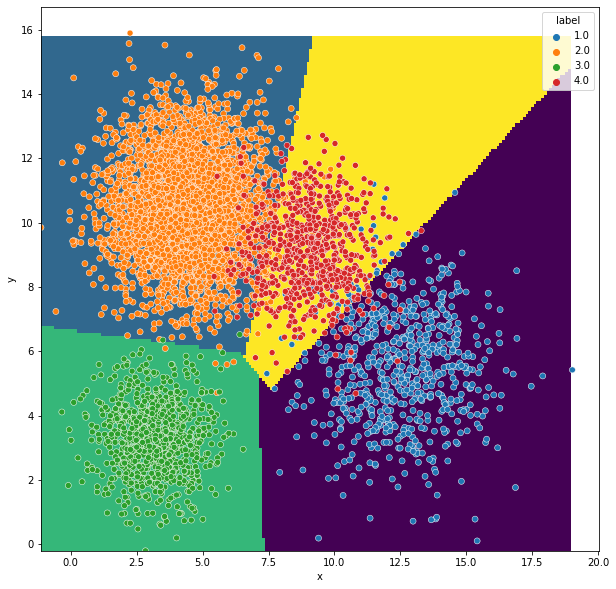

In [ ]:
lcl = svm.SVC(kernel='linear')
lcl.fit(attribute_train,label_train)
zz_row=lcl.predict(np.c_[xx_row,yy_row])
zz=zz_row.reshape(xx.shape)

plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [267]:
attri = np.array(points[['x','y']])
label = points['label'].values.astype(int)-1
num_labels = np.unique(label).shape[0]
num_rec=attri.shape[0]
num_attri = attri.shape[1]
print(num_labels,num_rec,num_attri)
xmin = np.min(points['x'])
xmax = np.max(points['x'])
ymin = np.min(points['y'])
ymax = np.max(points['y'])

4 6171 2


In [35]:
def LossFunction(data,label,weights,delta):
    num_rec = data.shape[0]
    scores = weights @ data.T 
    margins = np.maximum(0,scores-scores[label,np.arange(num_rec)]+delta)
    margins[label,np.arange(num_rec)] = 0 
    loss = np.sum(margins)/num_rec
    return loss 
    
    

In [42]:
weights = np.random.random([num_labels,num_attri])
print(LossFunction(attri,label,weights=weights,delta=1))

7.485177009460216


In [56]:
def LossFunctionGradient(data,label,weights,delta,eps=1E-3):
    
    num_rec = data.shape[0]
    scores = weights @ data.T 
    margins = np.maximum(0,scores-scores[label,np.arange(num_rec)]+delta)
    margins[label,np.arange(num_rec)] = 0 
    loss = np.sum(margins)/num_rec
    
    num_pixels = weights.shape[1]  
    num_classes = weights.shape[0]
  
    gradient = np.zeros(weights.shape)
    for jind in range(num_pixels): 
        pert = eps*data.T[jind,:]
        for iind in range(num_classes):    
            newScores = scores.copy()
            newScores[iind,:] = scores[iind,:]+pert
            newmargins = np.maximum(0,newScores-newScores[label,np.arange(num_rec)]+delta)
            newmargins[label,np.arange(num_rec)]=0
            newloss = np.sum(newmargins)/num_rec
            gradient[iind,jind]=(newloss - loss)/eps
    
    return loss,gradient

In [62]:
weights = np.random.random([num_labels,num_attri])
print(LossFunctionGradient(attri,label,weights=weights,delta=1))

(3.729717741127774, array([[ 1.38231627,  1.45317143],
       [ 1.81041839,  1.73512217],
       [ 0.13126818,  0.12004685],
       [-3.32219101, -3.30782169]]))


In [250]:
weigths = np.random.random([num_labels,num_attri])
num_steps = 2000
learning_rate = 0.1
records = []
for iind in range(num_steps):
    selected_data = np.random.randint(0,num_rec,100)
    loss,gradient=LossFunctionGradient(attri[selected_data,:],label[selected_data],weights,1)
    old_weights = weights.copy()
    
    grad_mag = np.linalg.norm(gradient)
    
    if(iind%100 == 0):
        learning_rate = learning_rate*0.5
    
    weights = weights-learning_rate*gradient/grad_mag
    
    records.append([iind+1,loss,learning_rate,grad_mag])

    # print(f'Step - {iind+1}, Loss - {loss}, Learning Rate - {learning_rate}, magnitude of gradient - {grad_mag}')
    
    if(grad_mag <1E-6):
        break

    

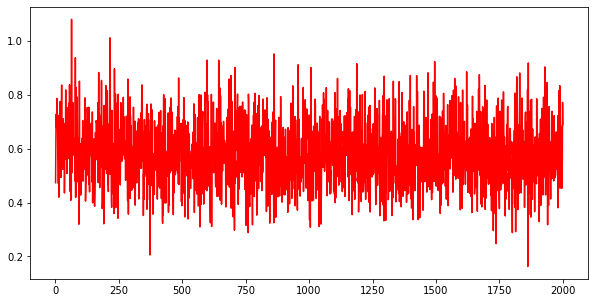

In [95]:
df=pd.DataFrame.from_records(records,columns=['Step','Loss','Learning Rate','Gradient_Magnitude'])
fig = plt.figure(figsize=[10,5])
fig.patch.set_facecolor(color="white")
plt.plot(df['Step'],df['Loss'],'-r')

In [138]:
def LossFunctionGradRegularization(data,label,weights,delta,eps=1E-3,lam=0.1):
    
    num_rec = data.shape[0]
    scores = weights @ data.T 
    margins = np.maximum(0,scores-scores[label,np.arange(num_rec)]+delta)
    margins[label,np.arange(num_rec)] = 0 
    loss = (np.sum(margins)/num_rec)
    regularization = (lam*(np.sum(weights**2)))
    
    num_pixels = weights.shape[1]  
    num_classes = weights.shape[0]
  
    gradient = np.zeros(weights.shape)
    for jind in range(num_pixels): 
        pert = eps*data.T[jind,:]
        for iind in range(num_classes):    
            newScores = scores.copy()
            newScores[iind,:] = scores[iind,:]+pert
            newmargins = np.maximum(0,newScores-newScores[label,np.arange(num_rec)]+delta)
            newmargins[label,np.arange(num_rec)]=0
            newloss = np.sum(newmargins)/num_rec
            gradient[iind,jind]=((newloss - loss)/eps)
    gradient = gradient + (2*lam*weights)
    loss = loss + regularization
    
    return loss,gradient

In [139]:
weights = np.random.random([num_labels,num_attri])
num_steps = 20000
learning_rate = 0.1
records = []
for iind in range(num_steps):
    selected_data = np.random.randint(0,num_rec,100)
    loss,gradient=LossFunctionGradRegularization(attri[selected_data,:],label[selected_data],weights,1)
    old_weights = weights.copy()
    
    grad_mag = np.linalg.norm(gradient)
    
    if(iind%1000 == 0):
        learning_rate = learning_rate*0.5
    
    weights = weights-learning_rate*gradient/grad_mag
    
    records.append([iind+1,loss,learning_rate,grad_mag])

    print(f'Step - {iind+1}, Loss - {loss}, Learning Rate - {learning_rate}, magnitude of gradient - {grad_mag}')
    
    if(grad_mag <1E-6):
        break

    

Step - 1, Loss - 5.811969678367316, Learning Rate - 0.05, magnitude of gradient - 10.705704019045704
Step - 2, Loss - 5.12568964786781, Learning Rate - 0.05, magnitude of gradient - 9.621988175208434
Step - 3, Loss - 4.015357535970026, Learning Rate - 0.05, magnitude of gradient - 3.8723972545264362
Step - 4, Loss - 4.0040616278738845, Learning Rate - 0.05, magnitude of gradient - 4.546271124791897
Step - 5, Loss - 4.502255435234204, Learning Rate - 0.05, magnitude of gradient - 5.454370474232182
Step - 6, Loss - 4.464808489418796, Learning Rate - 0.05, magnitude of gradient - 5.345036707152908
Step - 7, Loss - 3.287010837687764, Learning Rate - 0.05, magnitude of gradient - 4.701248368174648
Step - 8, Loss - 3.232797454290728, Learning Rate - 0.05, magnitude of gradient - 4.521220560820688
Step - 9, Loss - 3.1864828492685593, Learning Rate - 0.05, magnitude of gradient - 5.10340259176206
Step - 10, Loss - 3.1205613961779908, Learning Rate - 0.05, magnitude of gradient - 4.933640991886

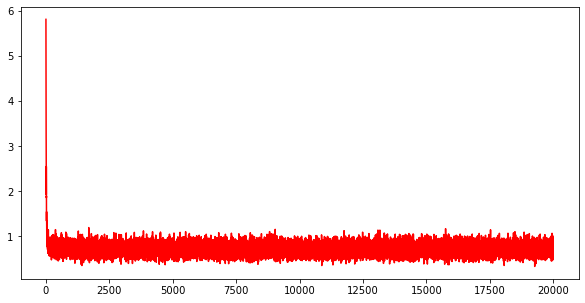

In [140]:
df=pd.DataFrame.from_records(records,columns=['Step','Loss','Learning Rate','Gradient_Magnitude'])
fig = plt.figure(figsize=[10,5])
fig.patch.set_facecolor(color="white")
plt.plot(df['Step'],df['Loss'],'-r')

In [252]:
p_score = weights @ attri.T

In [251]:
weights

array([[ 0.49389739, -0.89267036],
       [-0.88019122,  0.5821191 ],
       [-0.07663212, -0.126216  ],
       [-0.02777234, -0.07385127]])

In [253]:
def prediction(weights,attri,num_rec):
    p_score = weights @ attri.T
    pred_score = []
    for i in range(num_rec):
        # print(p_score[:,i])
        sep = list(p_score[:,i])
        max_val = max(p_score[:,i])
        pred_score.append(sep.index(max_val)+1)
    pred_score = np.array(pred_score)
    return np.array(pred_score)
    

In [254]:
xx_row = xx.ravel()
yy_row = yy.ravel()

<ipython-input-255-f698b38e6dc0>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,zz)


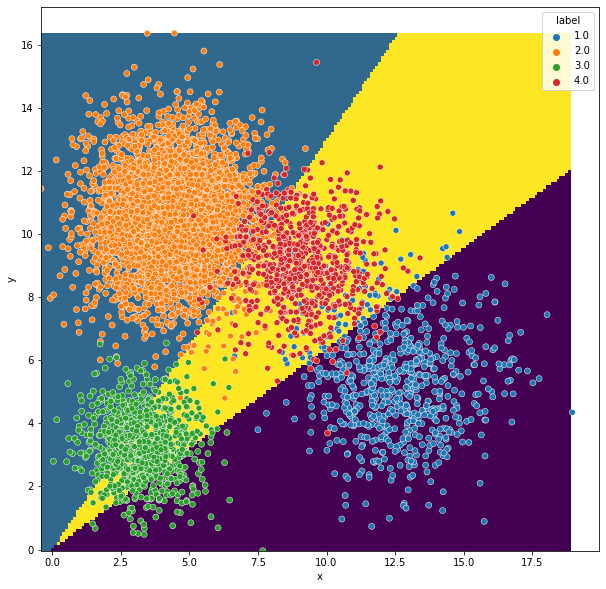

In [255]:
dg = pd.DataFrame({'x':xx_row,'y':yy_row})
zz_row=prediction(weights,np.array(dg[['x','y']]),len(dg['x']))
zz=zz_row.reshape(xx.shape)
plt.figure(figsize=[10,10])
plt.pcolormesh(xx,yy,zz)
sns.scatterplot(data=points,x='x',y='y',hue='label')
plt.show()
plt.close()

In [ ]:
def LossFunctionGradient(data,label,weights,b_value,delta,eps=1E-3):
    
    num_rec = data.shape[0]
    scores = (weights @ data.T)+
    margins = np.maximum(0,scores-scores[label,np.arange(num_rec)]+delta)
    margins[label,np.arange(num_rec)] = 0 
    loss = np.sum(margins)/num_rec
    
    num_pixels = weights.shape[1]  
    num_classes = weights.shape[0]
  
    gradient = np.zeros(weights.shape)
    for jind in range(num_pixels): 
        pert = eps*data.T[jind,:]
        for iind in range(num_classes):    
            newScores = scores.copy()
            newScores[iind,:] = scores[iind,:]+pert
            newmargins = np.maximum(0,newScores-newScores[label,np.arange(num_rec)]+delta)
            newmargins[label,np.arange(num_rec)]=0
            newloss = np.sum(newmargins)/num_rec
            gradient[iind,jind]=(newloss - loss)/eps
    
    return loss,gradient

In [240]:
np.unique(zz_row)

array([1, 2, 4])

In [256]:
p_score = weights @ attri.T

In [264]:
pre_sc = weights @ attri.T

In [276]:
import math
softmax = (math.e)**pre_sc[label,np.arange(num_rec)]/(math.e**pre_sc[:,np.arange(num_rec)])

In [296]:
softmax_p = []
softmax_loss = []
for i in range((pre_sc.shape[1])):
    row = pre_sc[:,i]
    y_lab = label[i]
    score_y = row[y_lab]
    e_yi = math.e**score_y
    row_e = sum(math.e**row) 
    proba = e_yi/row_e
    softmax_p.append(proba)
    loss = -(math.log(proba))
    softmax_loss.append(loss)
    
# label[:]

In [303]:
np.median(softmax_loss)

0.15954085521962103